## Selective Classification Can Magnify Disparities Across Groups


### AM207: Advanced Scientific Computing

#### Team: Jamelle Watson-Daniels, Shirley Wang, Bridger Ruyle, Paul Tembo

#### Paper: https://arxiv.org/pdf/2010.14134.pdfODOS: 

Minimal goal: Investigate how selective classification affects group accuracy on the `CelebA` dataset
- Generate synthetic dataset from `mnist`
- Train empirical risk minimization model (minimize loss - Logistic regression i.e. ResNet)    
- Calculate average coverage
- Calculate group coverage
- Calculate selective accuracy
- Plot average coverage vs group coverage for `CelebA` dataset
- Plot average coverage vs selective accuracy for `CelebA` dataset

If there is time goal: Show that selective accuracies on average and on the worst-group are determined by their respective margin distributions
- Calculate margin
- Calculate worst-group density
- Calculate Average density
- Plot margin (-10,+10) versus worst-group density
- Plot margin (-10,+10) versus Average density

Possible extensions: What are the characteristics of this dataset that are imbalanced and contain spurious correlations? We see that in all these datasets, the "worst group" is underrepresented as in there are much fewer examples for the "worst group" category. Notice that the datasets considered in this paper do not seem immediately relevant in terms of the real world implications of disparities, we wonder how we might examine this using toy examples.

#### Dataset description
"Models have been shown to latch onto spurious correlations between labels and demographic attributes such as race and gender (Buolamwini & Gebru, 2018; Joshi et al., 2018), and we
study this on the CelebA dataset (Liu et al., 2015). Following Sagawa et al. (2020), we consider
the task of classifying hair color, which is spuriously correlated with the gender. Concretely, inputs
are celebrity face images, labels are hair color Y = {blond, non-blond}, and spurious attributes are
gender, A = {male, female}, with blondness associated with being female. Of the four groups,
blond males are the smallest group, with only 1,387 examples out of 162,770 training examples, and
they tend to be the worst group empirically. We use the official train-val-split of the dataset."

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
resnet_9_logits = np.genfromtxt('prediction/RESNET_predict_9.csv', delimiter = ',')
y_test = np.genfromtxt('data/y_test.csv', delimiter = ',')
altered_labels_9 = np.genfromtxt('data/altereted_index_test_9.csv', delimiter = ',')

In [134]:
def confidence(logit, actual_class):
    predicted_class = np.argmax(logit, axis = 1)
    c_hat = [0.5 * np.log10(l[pc] / (1 - l[pc])) for l, pc in zip(logit, predicted_class)]
    c_hat = [c if c != np.inf else 3 for c in c_hat] ##need to fix this!
    c_hat = [c if pc == ac else -c for c, pc, ac in zip(c_hat, predicted_class, actual_class)]
    return(c_hat)

def dropout(confidence, tau):
    return(confidence[np.abs(confidence) > tau])

def coverage(confidence, tau):
    dropped_out = dropout(confidence, tau)
    return(len(dropped_out) / len(confidence))

def accuracy(confidence, tau):
    dropped_out = dropout(confidence, tau)
    return(np.sum(dropped_out > 0) / len(dropped_out))

In [135]:
confidence_resnet_9 = confidence(resnet_9_logits, y_test)

/Users/bjr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
worst_group = (y_test == 0) & (altered_labels_9 == 0) #the "worst" group is 2s (y label 0) without spurious feature (altered label 0)

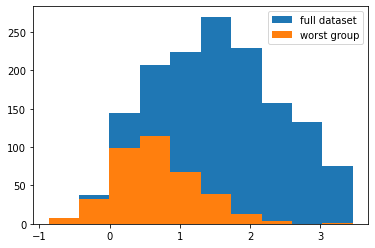

In [137]:
plt.hist(confidence_resnet_9, label = 'full dataset')
plt.hist(np.array(confidence_resnet_9)[worst_group], label = 'worst group')
plt.legend();

In [138]:
tau = np.linspace(0, 4, 100)
full_coverage = [coverage(np.array(confidence_resnet_9), t) for t in tau]
full_accuracy = [accuracy(np.array(confidence_resnet_9), t) for t in tau]
worst_coverage = [coverage(np.array(confidence_resnet_9)[worst_group], t) for t in tau]
worst_accuracy = [accuracy(np.array(confidence_resnet_9)[worst_group], t) for t in tau]

/Users/bjr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


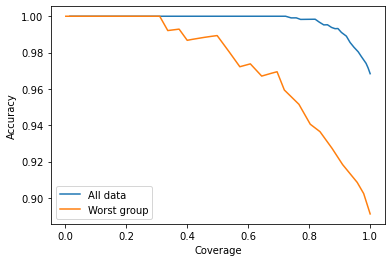

In [142]:
fig, ax = plt.subplots()
ax.plot(full_coverage, full_accuracy, label = 'All data')
ax.plot(worst_coverage, worst_accuracy, label = 'Worst group')
ax.set_xlabel('Coverage')
ax.set_ylabel('Accuracy')
ax.legend();